In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [224]:
battle = (plt.imread("Game Boy GBC - Pokemon Red Blue - Battle Interface.png")*255).astype(np.uint8)
intro  = (plt.imread("Game Boy GBC - Pokemon Red Blue - Intro and Title GB & SGB.png")*255).astype(np.uint8)

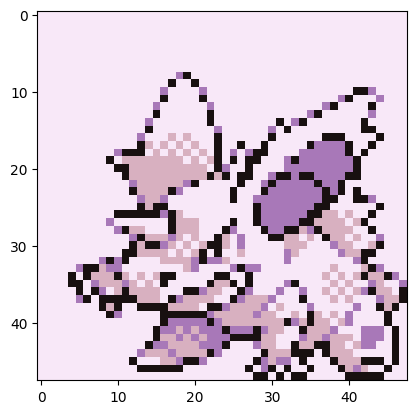

In [225]:
plt.imshow(intro[530:578, 984:984+48])

In [228]:
gengar = []
nidoran = []
for n in range(3):
    gengar.append(intro[472:472+56, 984+n*58:984+56+n*58, :3])
    nidoran.append(intro[530:530+48, 984+n*58:984+48+n*58, :3])
    gengar[n][gengar[n] == np.array([248, 232, 248])] = 255
    nidoran[n][nidoran[n] == np.array([248, 232, 248])] = 255

In [230]:
for n, image in enumerate(gengar):
    plt.imsave(f"assets/gengar{n}.png", image)
for n, image in enumerate(nidoran):
    plt.imsave(f"assets/nidoran{n}.png", image)

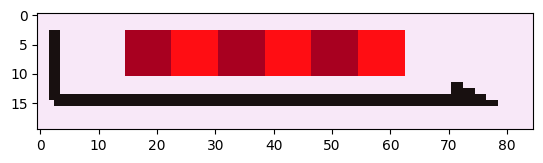

In [282]:
plt.imshow(battle[805:825, 185:270, :3])

In [312]:
text_box = battle[104:152, 8:168, :3]
text_box[text_box == 248] = 255
plt.imsave("assets/text_box.png", text_box)

arrow = battle[808:821, 187:264, :3]
arrow[arrow == np.array([248, 232, 248])] = 255
arrow[arrow == np.array([168,   0,  32])] = 255
arrow[arrow == np.array([255,  13,  19])] = 255


bar = []
for n in range(3):
    bar.append(battle[792+16*n:796+16*n, 360:410, :3])
    bar[n][bar[n] == np.array([248, 232, 248])] = 255
    plt.imsave(f"assets/bar{n}.png", bar[n])


array([255, 255, 255], dtype=uint8)

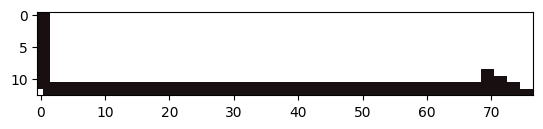

In [313]:
plt.imshow(arrow)
arrow[5, 25]

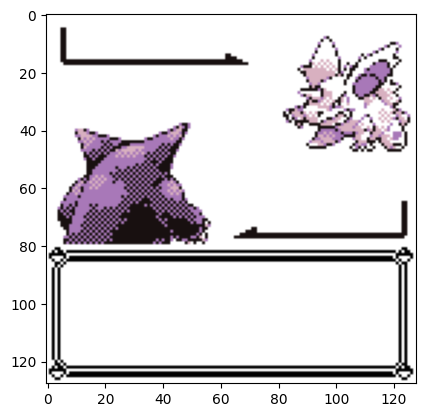

In [338]:
base = np.ones((128, 128, 3), dtype=np.uint8)*255
base[128-48:128, ::, ::] = text_box[::, :128, ::]
base[128-48:128, 100:129, ::] = text_box[::, 132:160, ::]
base[88:120, 8:120] = 255

base[5:5+13, 5:5+40] = arrow[:, :40]
base[5:5+13, 25:25+45] = arrow[:, 32:]

base[65:65+13, 85:85+40] = arrow[:, :40][:, ::-1]
base[65:65+13, 65:65+45] = arrow[:, 32:][:, ::-1]

# base[24:24+56, 4:4+56] = gengar[0]  *1
# base[0:0+48, 78:78+48] = nidoran[0] *1

plt.imshow(base)